In [1]:
#import libraries
import dgl
import pandas as pd
import networkx as nx
import numpy as np

#import python files
import Configuration

In [2]:
class BuildGraph:
    def __init__(self, df):
        self.df = df
        self.df = self.df.drop(['Churn'],axis=1)
        self.graph = dgl.DGLGraph()
        self.graph.add_nodes(len(self.df))  
        
    def compare_similarity(self, row1, row2):
        similarity_score = np.dot(row1,row2)
        if similarity_score >= Configuration.SIMILARITY_THRESHOLD:
            return True 
        else:
            return False

    def create_edges(self, val1, val2, node1, node2):
        if self.compare_similarity(val1, val2):
            edge_list = [(node1, node2)]
            src, dst = tuple(zip(*edge_list))
            self.graph.add_edges(src, dst)
            self.graph.add_edges(dst, src)

    def build_graph(self):
        for i in range(len(self.df)-1):
            for j in range(i+1,len(self.df)):
                self.create_edges(self.df.iloc[i:i+1,:].values[0], self.df.iloc[j:j+1,:].values[0],i,j)
        return self.graph
    
    def show_graph(self):
        nx_G = self.graph.to_networkx().to_undirected()
        pos = nx.kamada_kawai_layout(nx_G)
        nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])
        
    
    def assign_features_to_nodes(self):
        for i in range(len(self.df)):
            self.graph.nodes[i].data['feat'] =  self.df.iloc[[i],:].values
        return self.graph

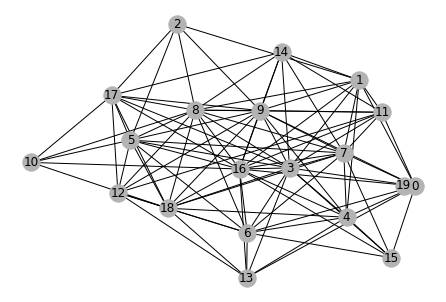

In [17]:
if __name__ == "__main__":
    df = pd.read_csv(Configuration.PROCESSED_FILE_PATH, nrows=20)#Configuration.NUMBER_OF_ROWS)
    buildGraph = BuildGraph(df)
    graph = buildGraph.build_graph()
    graph = buildGraph.assign_features_to_nodes()
    buildGraph.show_graph()